# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

warnings.filterwarnings("ignore", category=FutureWarning)

warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import AgglomerativeClustering as AC

from sklearn.decomposition import PCA   

from sklearn.manifold import TSNE

from PyPower import *

In [7]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

clusters_8 = kmeans.fit(X)

preds_8 = clusters_8.fit_predict(X)

silhouette_score(X, preds_8)

0.5406824747857603

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [30]:
kmeans = KMeans(n_clusters=5)

clusters_5 = kmeans.fit(X)

preds_5 = clusters_5.fit_predict(X)

silhouette_score(X, preds_5)

0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [62]:
kmeans = KMeans(n_clusters=3)

clusters_3 = kmeans.fit(X)

preds_3 = clusters_3.fit_predict(X)

labels = clusters_3.labels_

silhouette_score(X, preds_3)

0.5711381937868838

In [63]:
X['labels'] = labels

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

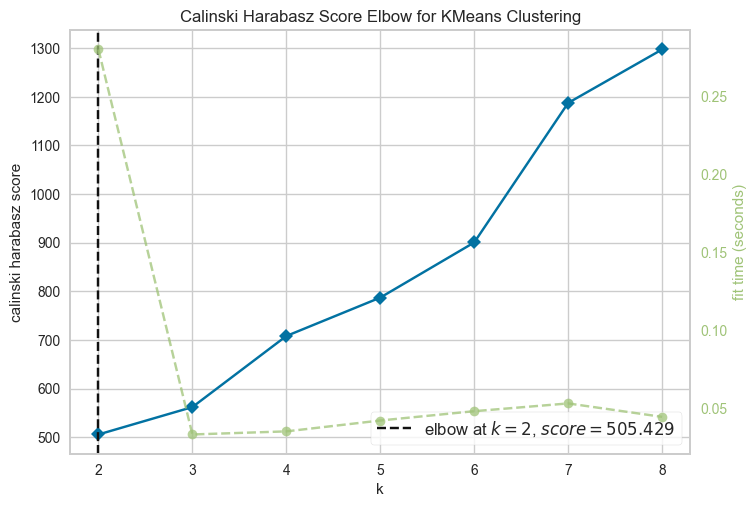

In [44]:
# 3 clusters en calinski harabaz

viz_3 = KElbowVisualizer(clusters_3, k=(2,9), metric='calinski_harabasz')

viz_3.fit(X)

viz_3.poof();

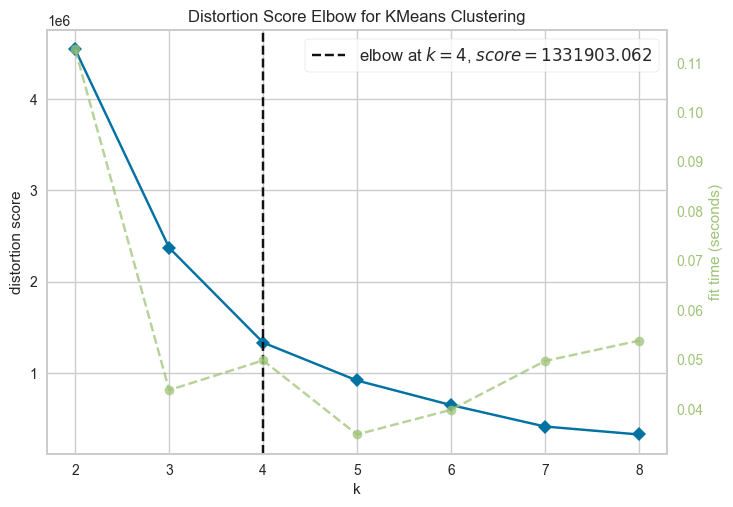

In [43]:
# 5 clusters en distortion

viz_5 = KElbowVisualizer(clusters_5, k=(2,9), metric='distortion')

viz_5.fit(X)

viz_5.poof();

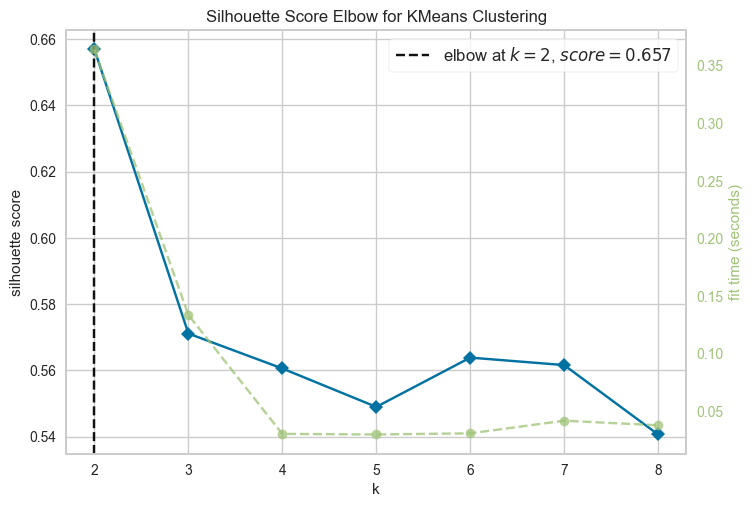

In [42]:
# 5 clusters en silhouette

viz_5 = KElbowVisualizer(clusters_5, k=(2,9), metric='silhouette')

viz_5.fit(X)

viz_5.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [47]:
clusterAC = AC().fit(X)

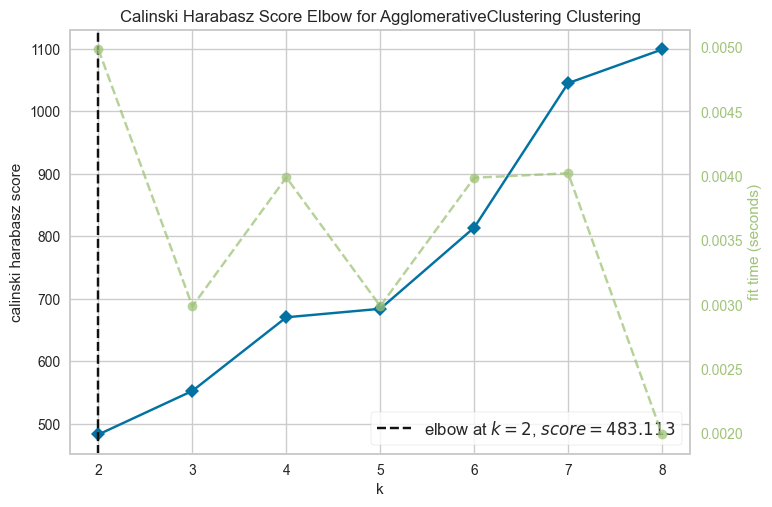

In [53]:
viz_calinski = KElbowVisualizer(clusterAC, k=(2,9), metric='calinski_harabasz')

viz_calinski.fit(X)

viz_calinski.poof();

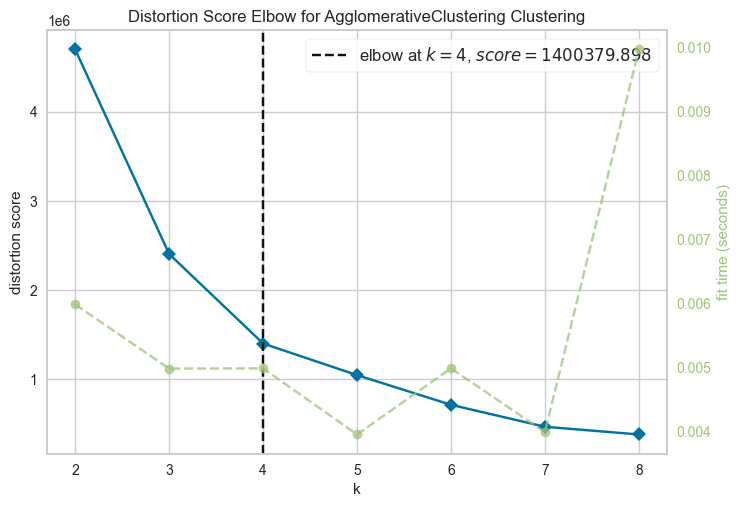

In [54]:
viz_distortion = KElbowVisualizer(clusterAC, k=(2,9), metric='distortion')

viz_distortion.fit(X)

viz_distortion.poof();

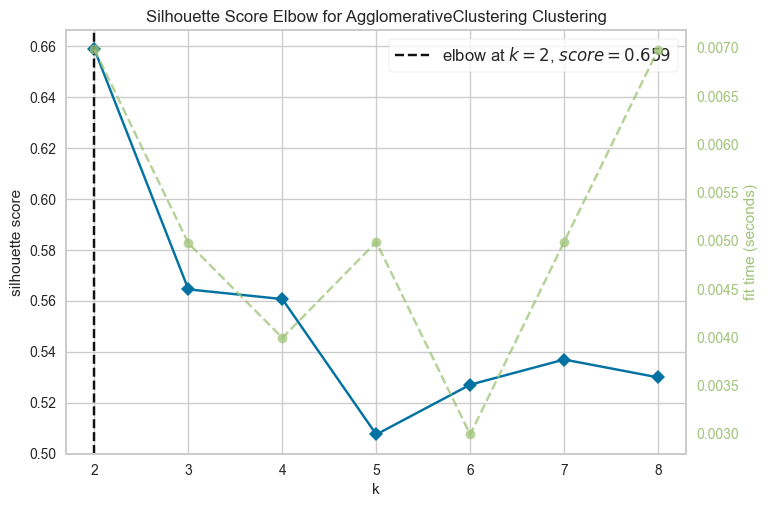

In [55]:
viz_silhouette = KElbowVisualizer(clusterAC, k=(2,9), metric='silhouette')

viz_silhouette.fit(X)

viz_silhouette.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

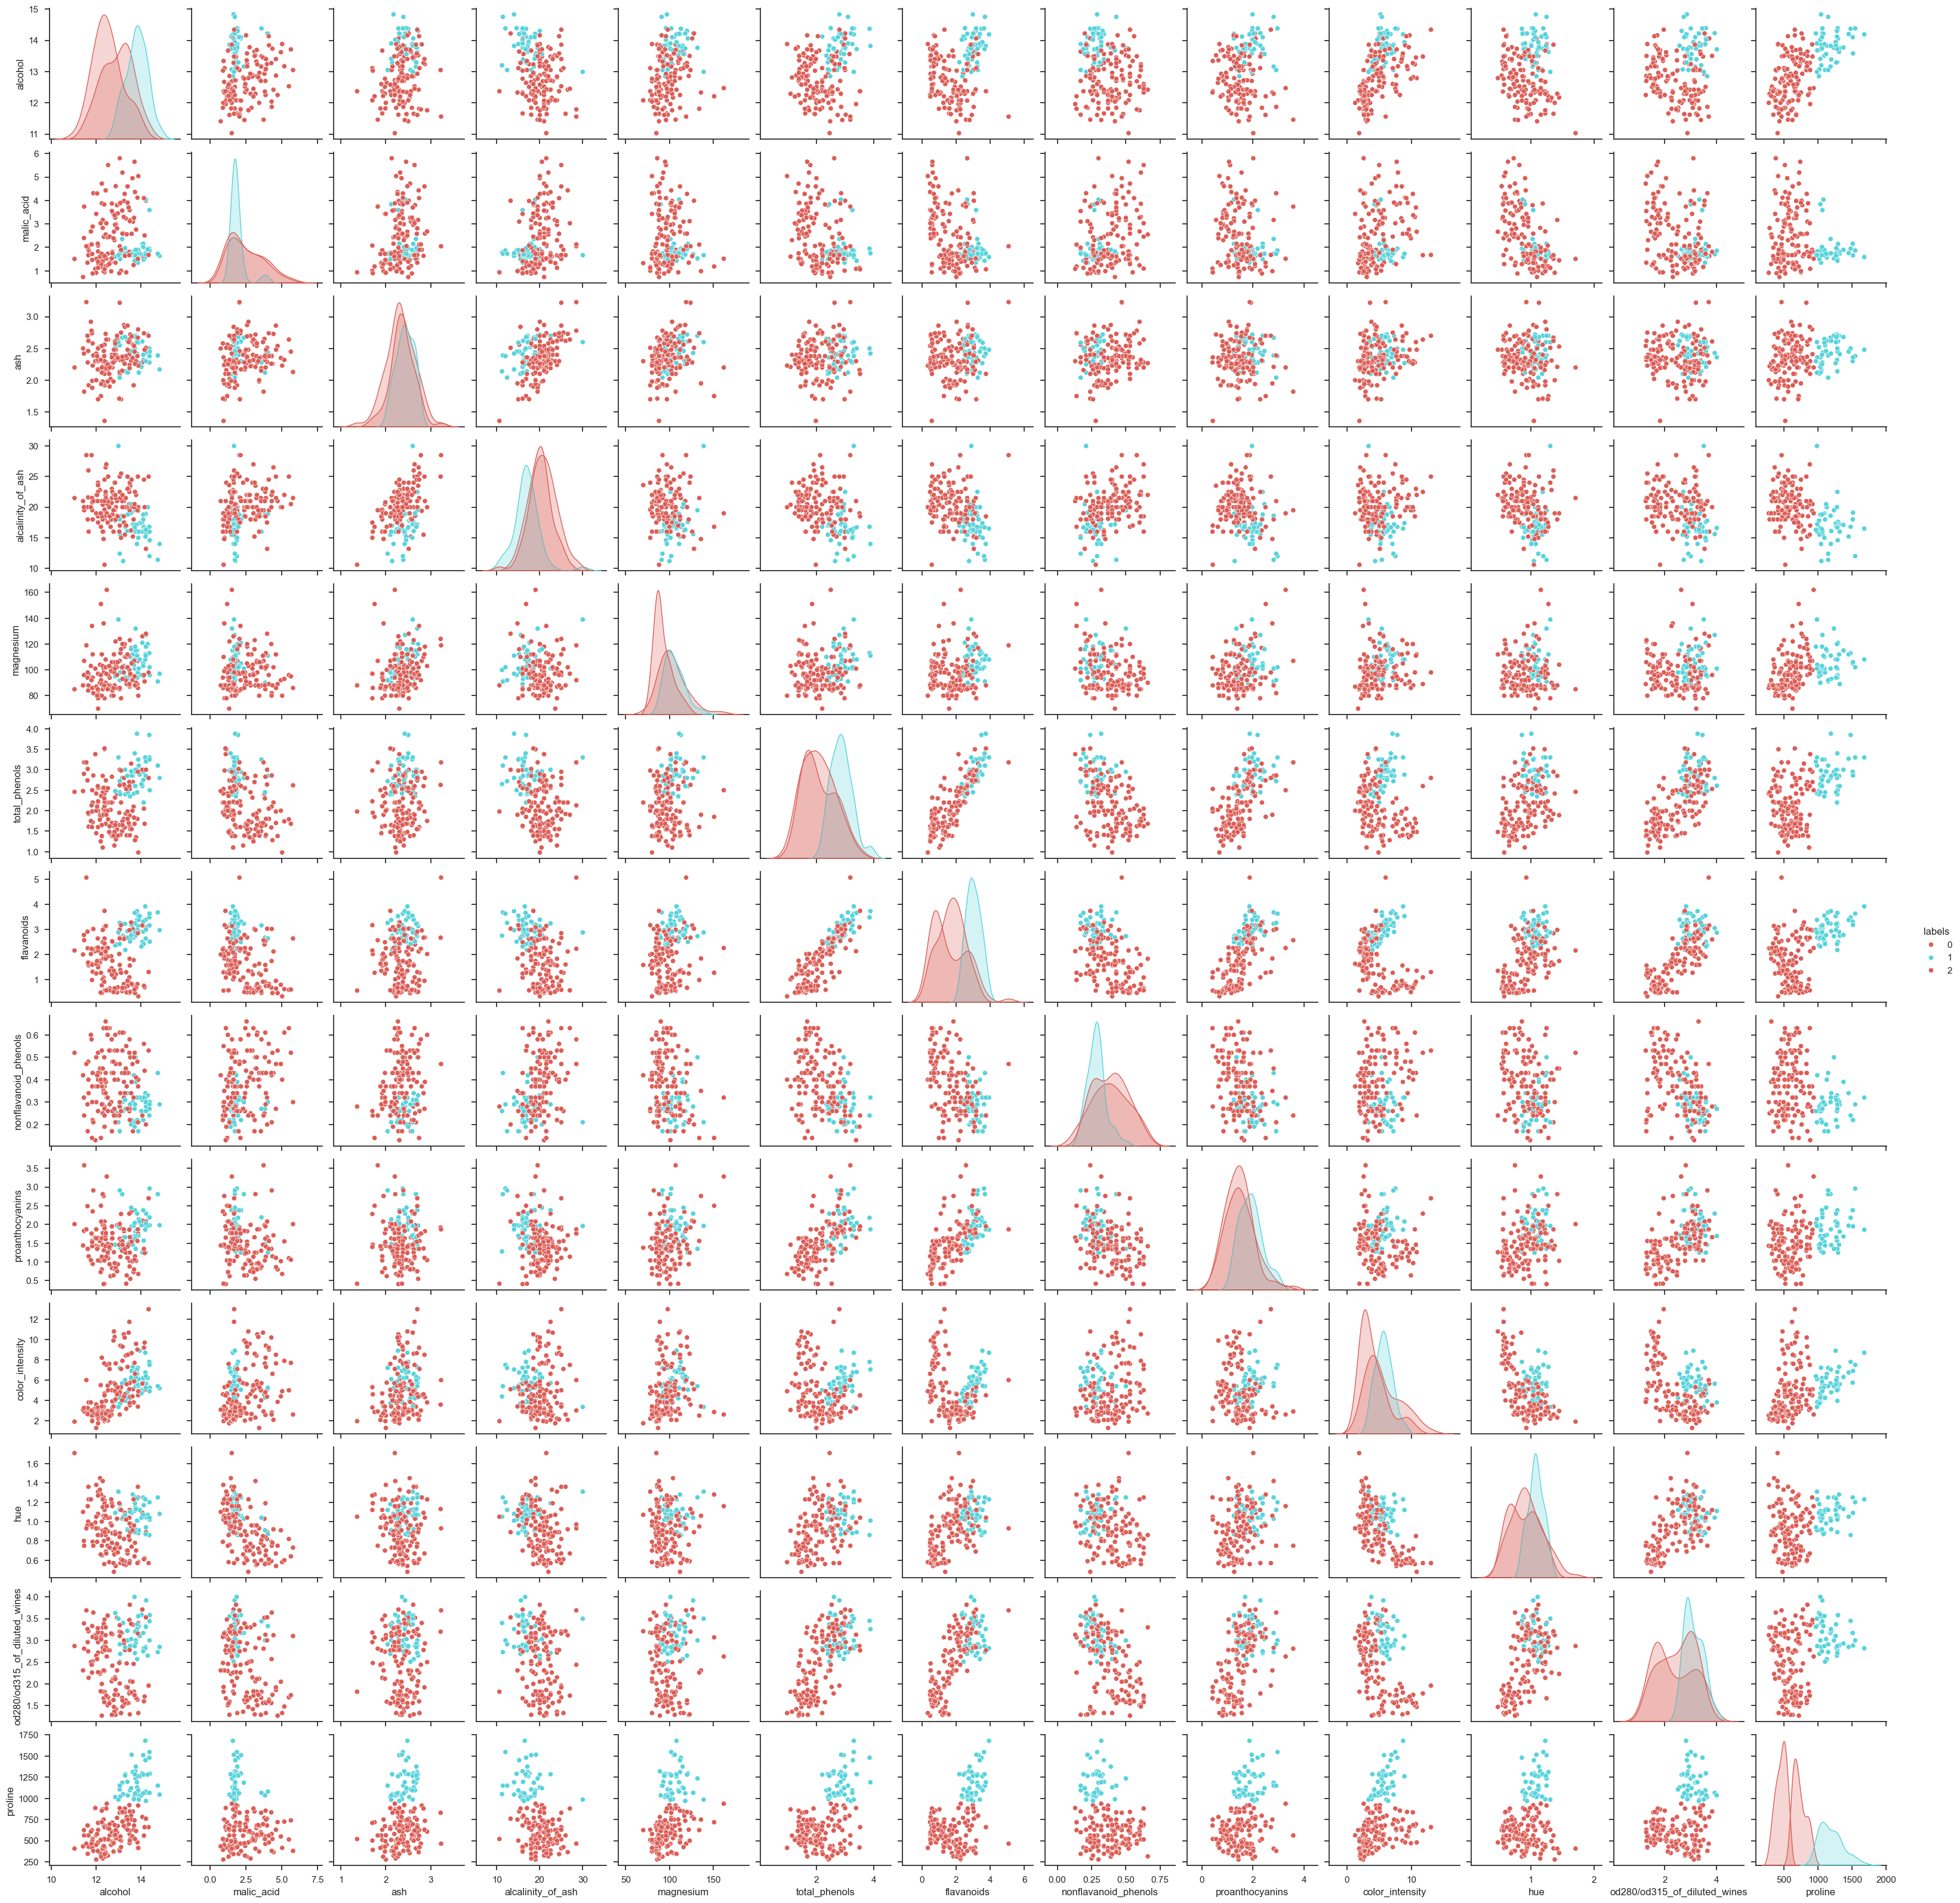

In [70]:

sns.set(style="ticks")
sns.pairplot(X, hue="labels", palette="hls", markers=["o"])
plt.show()


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [72]:
pca = PCA()

pca.fit(X)

print(X.shape)

(178, 14)


In [74]:
pca.explained_variance_ratio_

array([9.98084955e-01, 1.73622447e-03, 9.49950612e-05, 5.04554089e-05,
       1.25789473e-05, 8.84322164e-06, 5.22881415e-06, 2.74445104e-06,
       1.52113217e-06, 1.09522518e-06, 6.98415558e-07, 3.66039617e-07,
       2.10852584e-07, 8.25127769e-08])

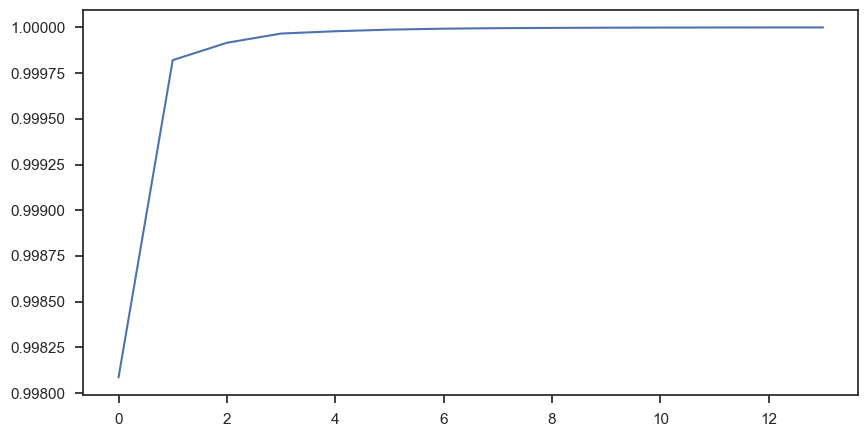

In [76]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_));

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

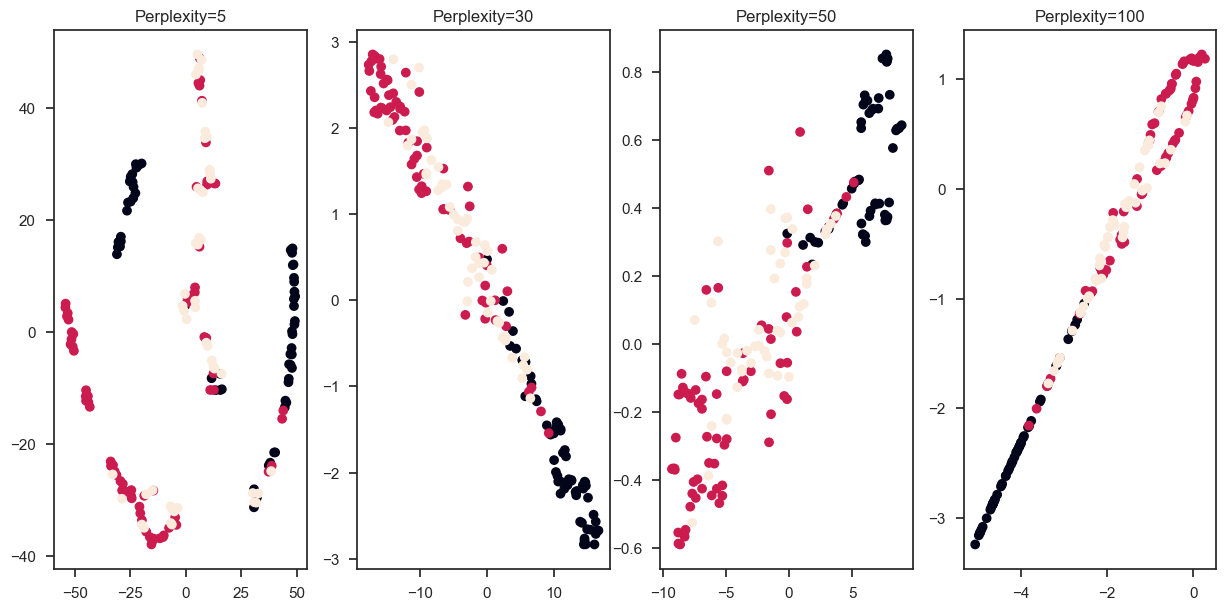

In [78]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();